In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/SocialNetworkAds.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X= df.iloc[:,2:4]
y=df['Purchased']

In [5]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
classifier.fit(x_train, y_train)

GaussianNB()

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

In [11]:
cm

array([[50,  4],
       [ 1, 25]], dtype=int64)

C:\Users\Kyle\AppData\Local\Temp\ipykernel_3232\604566138.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],cmap=ListedColormap(('blue','yellow'))(i),label=j)


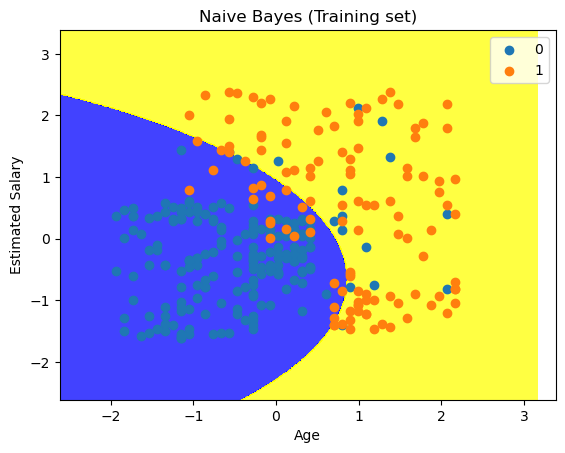

In [12]:
# Visualizing the classifier on the training data
from matplotlib.colors import ListedColormap

def visualize(x,y):
    X_set, y_set = x, y

    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max() + 1,step = 0.01),
                        np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max() + 1,step = 0.01))

    plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.74,
                 cmap=ListedColormap(('blue','yellow')))
    plt.xlim(X1.min(),X1.max())
    plt.xlim(X2.min(),X2.max())

    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],cmap=ListedColormap(('blue','yellow'))(i),label=j)

    plt.title('Naive Bayes (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    
visualize(x_train,y_train)

C:\Users\Kyle\AppData\Local\Temp\ipykernel_3232\604566138.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],cmap=ListedColormap(('blue','yellow'))(i),label=j)


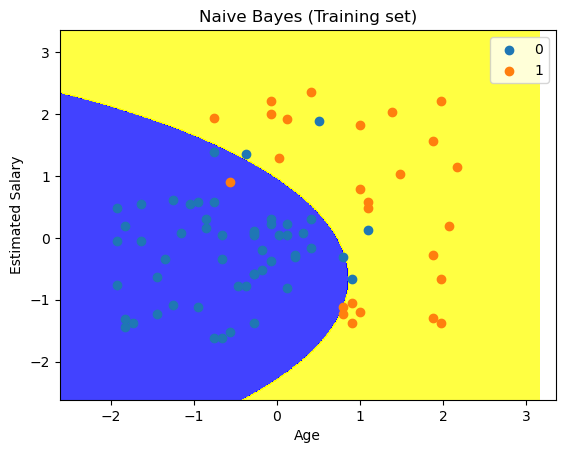

In [13]:
# Now to visualize on the test set
visualize(x_test,y_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.86      0.96      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

